# **Are u Ready to Explore the Data ?**
* To explore the data u need to : 

    * Understand the data - types and structure using (simple exploration techniques head(),info(),describe()...etc).
    * Numeric exploration (histogram, box-plot, distribution )
    * Study the correlations between the attributes and the target.

## **Data Simple Exploration**


First Few Rows:
   Age  Income  Experience  level
0   25   50000         2.0     hi
1   30   60000         5.0  hello
2   35   75000         8.0   None
3   40   80000        10.0  hello
4   45   90000        12.0  hello
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         10 non-null     int64  
 1   Income      10 non-null     int64  
 2   Experience  9 non-null      float64
 3   level       8 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes
None

Summary Statistics:
             Age         Income  Experience
count  10.000000      10.000000    9.000000
mean   47.500000   95500.000000   13.555556
std    15.138252   29856.136537    8.032918
min    25.000000   50000.000000    2.000000
25%    36.250000   76250.000000    8.000000
50%    47.500000   95000.000000   12.000000
75%    58.75000

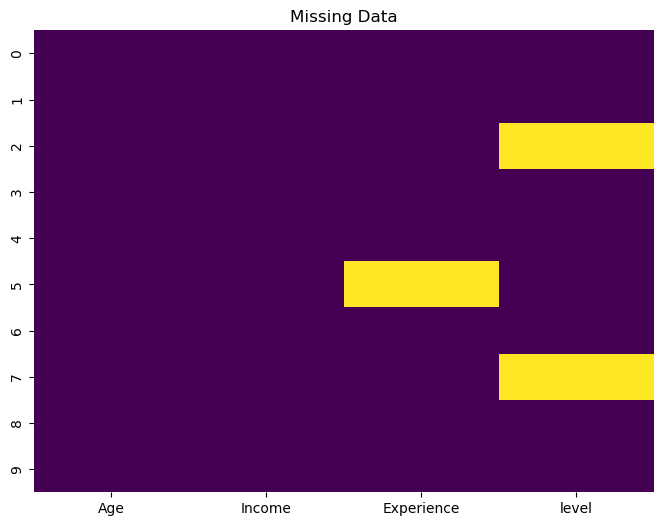

In [3]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def explore_data_simple(dataframe):
    """
    Perform exploratory data analysis (EDA) on a pandas DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame to explore.

    Returns:
        None
    """
    # Display the first few rows of the DataFrame
    print("\nFirst Few Rows:")
    print(dataframe.head())

    # Display basic information about the DataFrame
    print("DataFrame Info:")
    print(dataframe.info())

    # Display summary statistics
    print("\nSummary Statistics:")
    print(dataframe.describe())


    # Get and visualize missing data
    print("Number of missing values for each column:") 
    print(dataframe.isna().sum())
    print("Percentage of missing values for each column:") 
    print(dataframe.isna().sum()/dataframe.shape[0])
    plt.figure(figsize=(8, 6))
    sns.heatmap(dataframe.isnull(), cmap="viridis", cbar=False)
    plt.title("Missing Data")
    plt.show()




## **Numeric exploration**

In [10]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def numeric_exploration(dataframe):
    """
    Visualize distributions of numeric columns in a pandas DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    # Select numeric columns
    numeric_cols = dataframe.select_dtypes(include=['number']).columns

    # Create subplots for histograms and box plots
    fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(12, 6 * len(numeric_cols)))

    for i, col in enumerate(numeric_cols):
        # Plot histogram
        sns.histplot(dataframe[col], ax=axes[i, 0], bins=20, kde=True)
        axes[i, 0].set_title(f'Histogram of {col}')
        
        # Plot box plot
        sns.boxplot(data=dataframe[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()


# **Correlations**
* Correlation measures quantify the relationship between two variables and provide insights into how they change together

In [11]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

def calculate_correlations(dataframe, target_column):
    """
    Calculate and visualize correlations between the target column and other numeric columns.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        target_column (str): The target column for which correlations are calculated.

    Returns:
        None
    """
    # Calculate Pearson and Spearman correlations
    pearson_corr = dataframe.corr(method='pearson')[target_column]
    spearman_corr = dataframe.corr(method='spearman')[target_column]

    # Combine correlations into a DataFrame
    correlations = pd.DataFrame({'Pearson': pearson_corr, 'Spearman': spearman_corr})

    # Sort correlations in descending order
    correlations = correlations.sort_values(by=['Pearson', 'Spearman'], ascending=False)

    # Display correlations
    print("Correlations with", target_column)
    print(correlations)

    # Create a heatmap of correlations
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()


    # create scatter matrix 
    scatter_matrix(dataframe, figsize=(12, 8))

